In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**1. Loading the Data**
The dataset is downloaded from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector

In [2]:
data = pd.read_csv("./datasets/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


**2. Data Preprocessing**

In [3]:
print("Shape of data: ", data.shape)
print("Columns of data: ",data.columns)

Shape of data:  (11054, 32)
Columns of data:  Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [8]:
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [5]:
data = data.drop(['Index'],axis = 1)


In [8]:
data.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [6]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,-1,1,1,1,-1,1,-1,1,1,...,1,1,1,-1,1,-1,1,1,1,-1
1,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
2,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,-1,1,0,-1,1,0,1,-1
3,-1,-1,-1,1,-1,-1,0,1,-1,1,...,1,1,-1,-1,1,1,-1,1,1,1
4,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,-1,1,1,1,1


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


In [7]:
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
d_cleaned = data.dropna()

# Convert 'class' to integer type
d_cleaned['class'] = d_cleaned['class'].astype(int)

**3. Data Visualization**

/tmp/ipykernel_17542/1637603721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=d_cleaned["class"], palette="coolwarm")


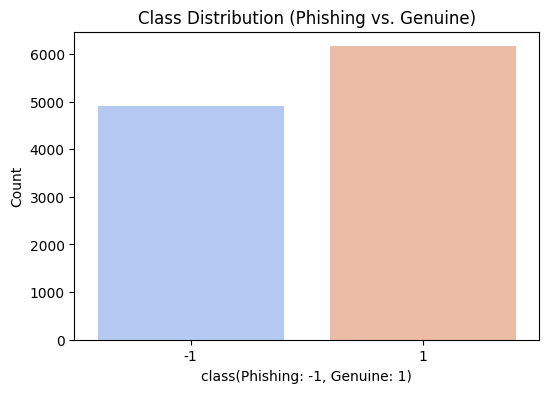

In [8]:
#Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=d_cleaned["class"], palette="coolwarm")
plt.title("Class Distribution (Phishing vs. Genuine)" )
plt.xlabel("class(Phishing: -1, Genuine: 1)")
plt.ylabel("Count")
plt.show()

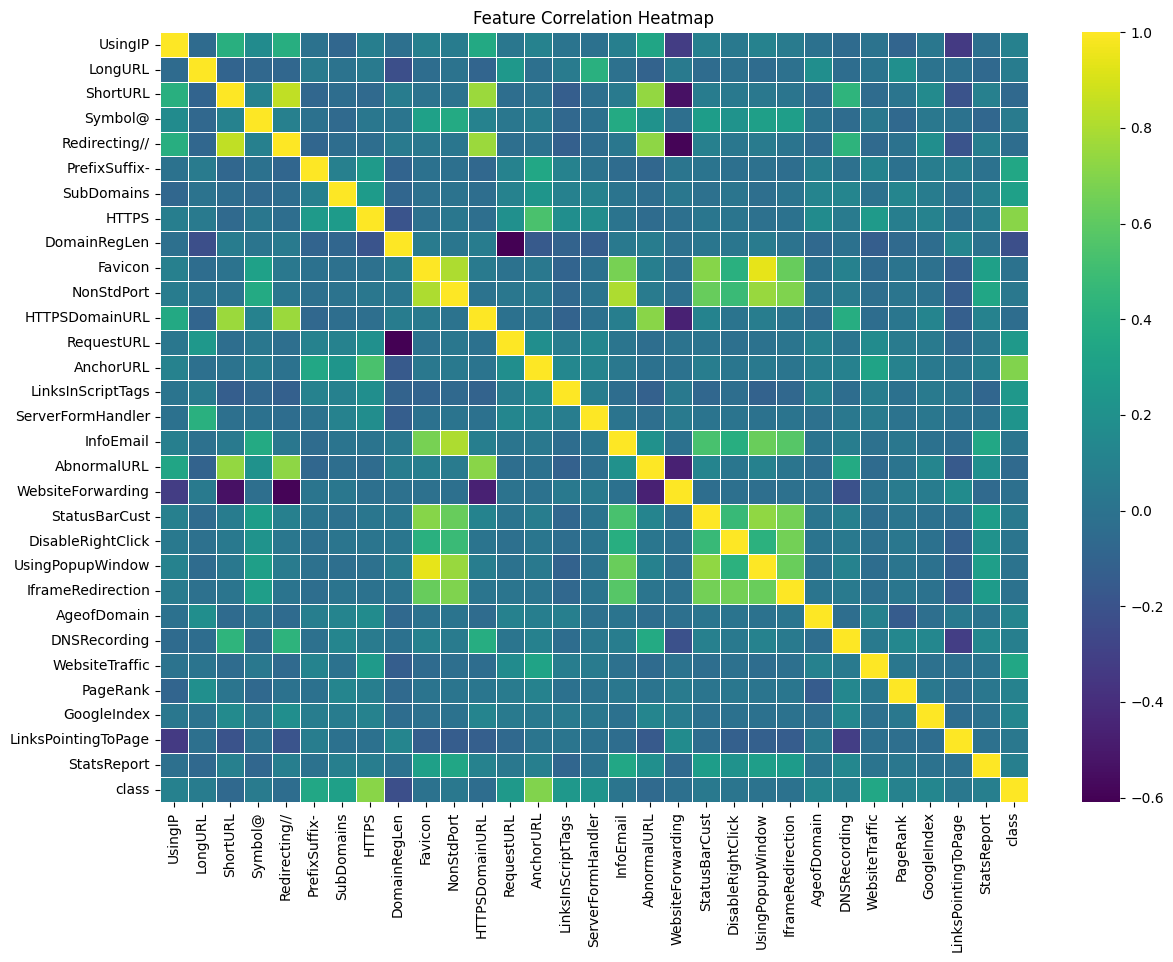

In [12]:
plt.figure(figsize=(14, 10))
sns.heatmap(d_cleaned.corr(), cmap="viridis", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

/tmp/ipykernel_17542/2043995251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y=d_cleaned[feature], data=d_cleaned, palette="viridis")
/tmp/ipykernel_17542/2043995251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y=d_cleaned[feature], data=d_cleaned, palette="viridis")
/tmp/ipykernel_17542/2043995251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y=d_cleaned[feature], data=d_cleaned, palette="viridis")
/tmp/ipykernel_17542/2043995251.py:5: FutureWarning: 

Passing `palette` without assigning 

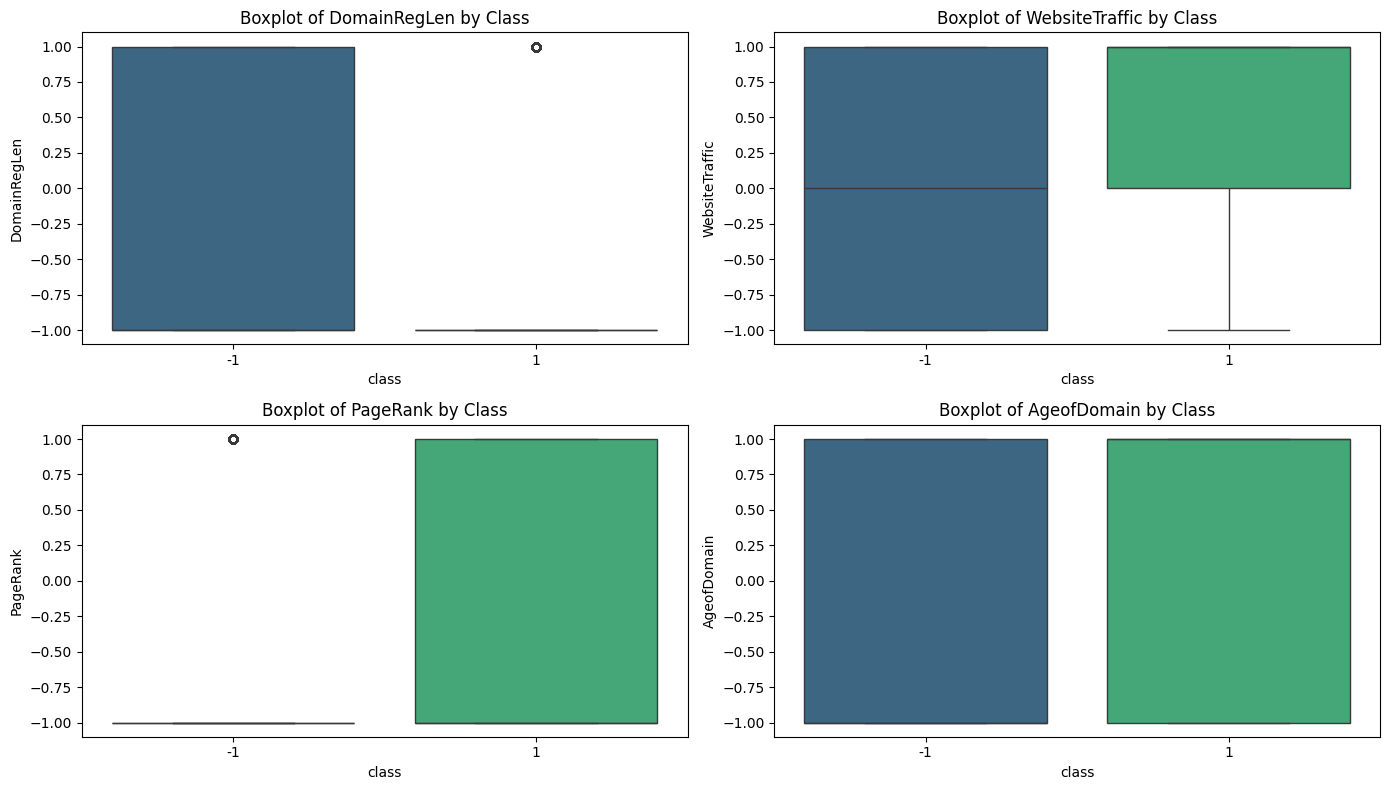

In [9]:
key_features = ["DomainRegLen", "WebsiteTraffic", "PageRank", "AgeofDomain"]
plt.figure(figsize=(14, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="class", y=d_cleaned[feature], data=d_cleaned, palette="viridis")
    plt.title(f"Boxplot of {feature} by Class")
plt.tight_layout()
plt.show()

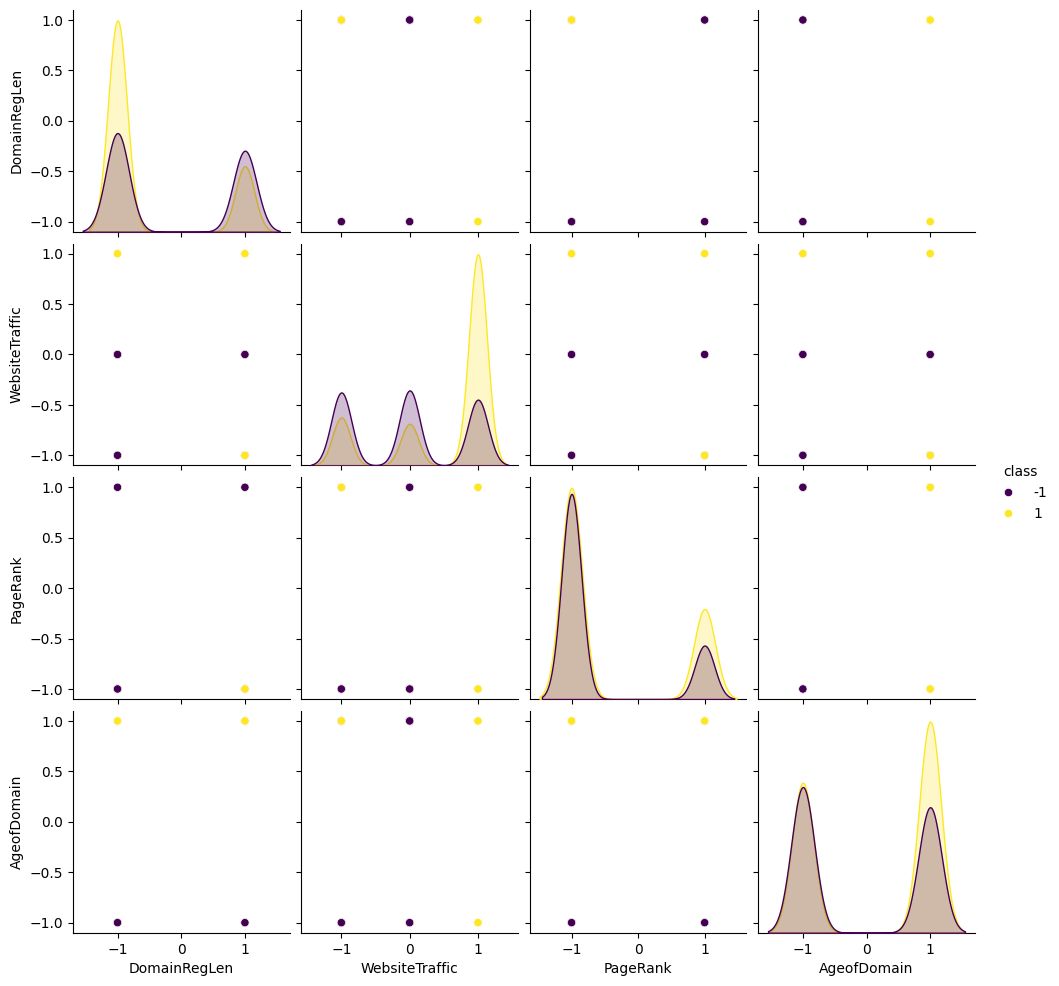

In [13]:
selected_features = ["DomainRegLen", "WebsiteTraffic", "PageRank", "AgeofDomain", "class"]
sns.pairplot(d_cleaned[selected_features], hue="class", palette="viridis")
plt.show()

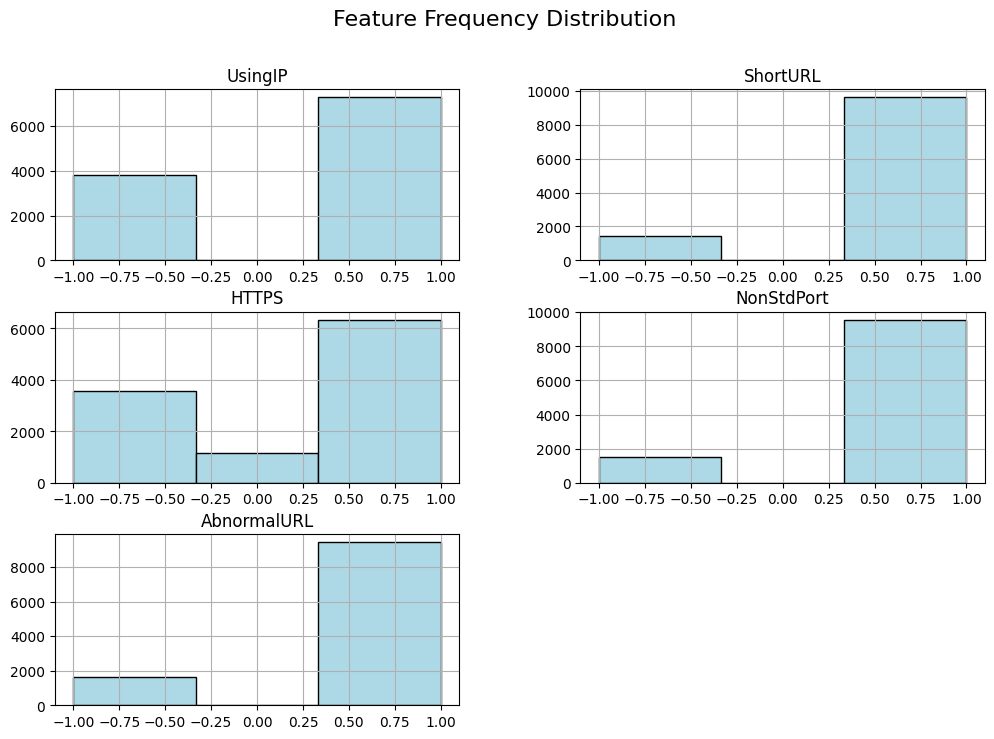

In [10]:
categorical_features = ["UsingIP", "ShortURL", "HTTPS", "NonStdPort", "AbnormalURL"]
d_cleaned[categorical_features].hist(figsize=(12, 8), bins=3, color='lightblue', edgecolor='black')
plt.suptitle("Feature Frequency Distribution", fontsize=16)
plt.show()

In [14]:
phish_urls = pd.read_csv("./datasets/phishurls.csv")
p = phish_urls.head()
legit_urls = pd.read_csv("./datasets/legitimateurls.csv")
l = legit_urls.head()
print('Legitimate Urls', legit_urls)
print('Phishing Urls', phish_urls)

Legitimate Urls                          url
0                 google.com
1               facebook.com
2              amazonaws.com
3               a-msedge.net
4              microsoft.com
...                      ...
99995          personica.com
99996  pacodeandbulletin.gov
99997           websnadno.cz
99998        virtualhosts.eu
99999      testportal.gov.ua

[100000 rows x 1 columns]
Phishing Urls                                                      url
0                                https://t.co/4G81J8ZUck
1                         https://xcbrf.aqgiu.xyz/?kfiay
2                 https://omkjvsrmje.duckdns.org/en/main
3      https://docs.google.com/presentation/d/e/2PACX...
4      https://docs.google.com/presentation/d/e/2PACX...
...                                                  ...
60161   http://www.ezblox.site/free/jennifer111/helpdesk
60162  http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
60163  http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
60164       http://www.ha

In [15]:
legit_urls["label"] = 1
phish_urls["label"] = -1

In [16]:
urls_df = pd.concat([legit_urls, phish_urls], ignore_index=True)

In [17]:
urls_df.head()

,url,label
0,google.com,1
1,facebook.com,1
2,amazonaws.com,1
3,a-msedge.net,1
4,microsoft.com,1


In [40]:
urls_df.to_csv('urls_data.csv', index=False)

/tmp/ipykernel_17542/2626321171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=urls_df, palette='coolwarm')


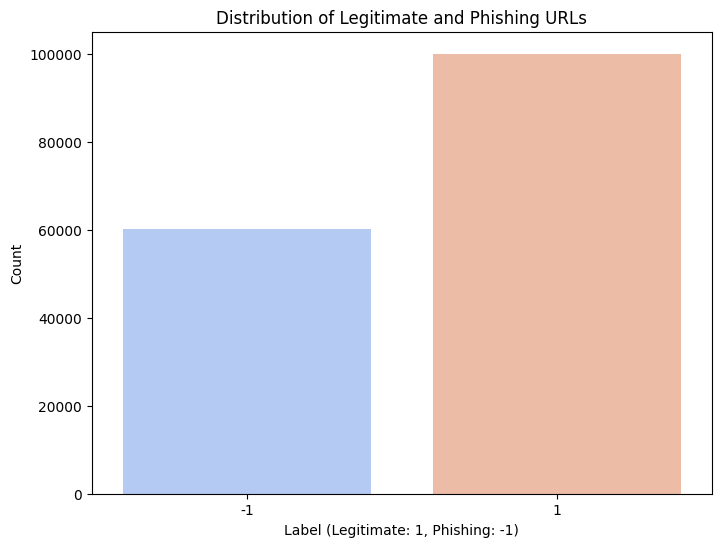

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=urls_df, palette='coolwarm')
plt.title('Distribution of Legitimate and Phishing URLs')
plt.xlabel('Label (Legitimate: 1, Phishing: -1)')
plt.ylabel('Count')
plt.show()